# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [12]:
# Read in data
df_hiv = pd.read_csv('HIV_ARTCOVERAGE.csv', encoding='latin1') # Data for the number of people receiving antiretroviral therapy (ART) and rstimated number of people living with HIV
df_hivm = pd.read_csv('HIV_Mortality.csv', encoding='latin1')# Number of deaths cause by HIV

In [13]:
# Perform your data wrangling and descriptive stats to help

df_hiv = df_hiv.query("Region == 'Global'").sort_values('Year') #Getting global data only
df_hivm = df_hivm.query("Region == 'Global'").sort_values('Year')

#Clean the data by removing values from the brackets indicating range. Get only the numerical value. 
df_hiv['Estimated antiretroviral therapy coverage among people living with HIV (%)'] = df_hiv['Estimated antiretroviral therapy coverage among people living with HIV (%)'].str.replace(r"\s*\[.*?\]\s*", "").str.strip()
df_hiv['Reported number of people receiving antiretroviral therapy'] = df_hiv['Reported number of people receiving antiretroviral therapy'].str.replace(r"\s*\[.*?\]\s*", "").str.strip().str.replace(" ","")
df_hiv['Estimated number of people (all ages) living with HIV'] = df_hiv['Estimated number of people (all ages) living with HIV'].str.replace(r"\s*\[.*?\]\s*", "").str.strip().str.replace(" ","")
df_hivm['Number of deaths due to HIV/AIDS'] = df_hivm['Number of deaths due to HIV/AIDS'].str.replace(r"\s*\[.*?\]\s*", "").str.strip().str.replace(" ","")

#Merge 2 tables
df_hiv = df_hiv.merge(df_hivm, left_on='Year', right_on='Year')

#correcting data types
df_hiv = df_hiv.astype({'Reported number of people receiving antiretroviral therapy': int})
df_hiv = df_hiv.astype({'Estimated number of people (all ages) living with HIV': int})
df_hiv = df_hiv.astype({'Number of deaths due to HIV/AIDS': int})

#Getting the Yearly value since data is in cumulative form
df_hiv['Reported number of people receiving antiretroviral therapy (Yearly)'] = df_hiv['Reported number of people receiving antiretroviral therapy'].diff().fillna(df_hiv['Reported number of people receiving antiretroviral therapy'].iloc[0])
df_hiv['Estimated number of people (all ages) living with HIV (Yearly)'] = df_hiv['Estimated number of people (all ages) living with HIV'].diff().fillna(df_hiv['Estimated number of people (all ages) living with HIV'].iloc[0])

df_hiv['Estimated antiretroviral therapy coverage among people living with HIV (%)'] = round(df_hiv['Reported number of people receiving antiretroviral therapy'] / df_hiv['Estimated number of people (all ages) living with HIV'] * 100, 2)
df_hiv = df_hiv.query("Year >= 1995") #Getting sample from 1995 - 2019

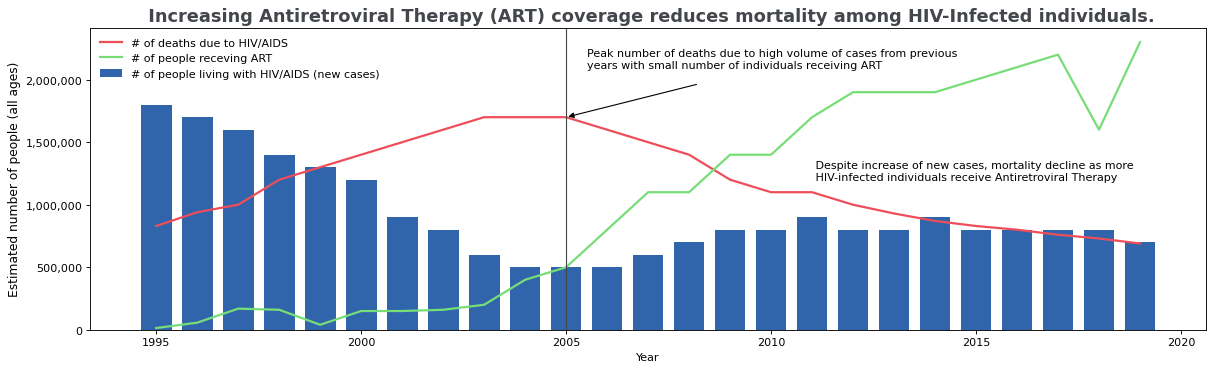

In [44]:
# Visualize your data

#assigning values to variables
est_numberofcases = df_hiv['Estimated number of people (all ages) living with HIV (Yearly)']
year = df_hiv['Year']
percentage_art = df_hiv['Estimated antiretroviral therapy coverage among people living with HIV (%)']
reported_no_art = df_hiv['Reported number of people receiving antiretroviral therapy (Yearly)'] 
mortality = df_hiv['Number of deaths due to HIV/AIDS']

#creating the chart
fig= plt.figure(figsize=(18,5), dpi=80, facecolor='white', edgecolor='black')
ax = fig.add_subplot(111)
ax.bar(year,est_numberofcases, color= '#3065ac', width = 0.75, label = '# of people living with HIV/AIDS (new cases)')
ax.plot(year,mortality, color= '#ee4d5a', linewidth = 2, label = '# of deaths due to HIV/AIDS' )
ax.plot(year,reported_no_art, color= '#77dd77', linewidth = 2,label = '# of people receving ART' )

#setting the borders of the chart
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_facecolor("white")

#
ax.set_ylabel('Estimated number of people (all ages)', fontsize = 11 , color = "black")
ax.set_xlabel('Year', fontsize = 10 , color = "black" )

plt.axvline(2005, color='#43464b', linewidth=1 ) # set boundary where we can see the peak number of death and when it start to decline
legend = ax.legend()
ax.legend(facecolor='white', framealpha=0)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#annotations
ax.text(2011, 1200000 ," Despite increase of new cases, mortality decline as more \n HIV-infected individuals receive Antiretroviral Therapy", color = "black" ,fontsize = 10)          
ax.set_title(' Increasing Antiretroviral Therapy (ART) coverage reduces mortality among HIV-Infected individuals.',
              fontsize = 16 ,color = "#43464b", fontweight ="bold")
ax.annotate(
    "Peak number of deaths due to high volume of cases from previous \nyears with small number of individuals receiving ART \n",
    (2005, 1700000),
    (2005.5, 2000000),
    arrowprops=dict(arrowstyle = "-|>", color = 'black'), fontsize = 10)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

ax.get_yaxis().set_major_formatter(
mtick.FuncFormatter(lambda x, p: format(int(x), ','))) # format y label with thousand comma


fig.savefig('Abarca_JohnPaul.png')

Caption: This is a figure about yearly global cases of HIV/AIDS from 1995 - 2019 and how Antiretroviral Therapy help in reducing mortality among HIV infected individuals.